In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the CSV file
data = pd.read_csv('titanic.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Handle missing values
# Fill missing Age values with the median age
# Age is an important factor in survival, so we fill missing values with the median age to preserve the distribution
data['Age'].fillna(data['Age'].median(), inplace=True)


In [5]:
# Fill missing Embarked values with the mode
# Embarked location can provide insights into socio-economic status, filling with mode (most common value) ensures minimal data loss
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [6]:
# Drop the Cabin column due to missing values
# Cabin information is largely missing, making imputation unreliable; we drop it to avoid introducing noise
data.drop(columns=['Cabin'], inplace=True)


In [7]:
# Convert categorical features to numerical
# Map 'Sex' to numerical values
# Sex is a binary category and can directly influence survival chances, converting it to numerical values for model compatibility
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [8]:
# One-hot encode the Embarked column
# Embarked has multiple categories and one-hot encoding prevents any ordinal assumptions
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [9]:
# Create FamilySize feature
# FamilySize (number of family members aboard) can influence survival; we create this feature by combining SibSp and Parch
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [10]:
# Extract titles from the Name column
# Titles can indicate social status, which affects survival; we extract and map them to numerical values
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
title_mapping = {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Others': 4}
data['Title'] = data['Title'].map(title_mapping)

In [11]:
# Drop the Name and Ticket columns as they are not useful for the model
# Name and Ticket columns contain mostly unique values that don't directly contribute to survival predictions
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [12]:
# Create age bins and one-hot encode them
# Age groups can have different survival probabilities; binning and encoding helps capture this without assuming linearity
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
data = pd.get_dummies(data, columns=['AgeBin'], drop_first=True)

In [13]:
# Standardize numerical features
# Standardization ensures that features with larger scales do not dominate the model training
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'FamilySize']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
# Standardize numerical features
# Standardization ensures that features with larger scales do not dominate the model training
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'FamilySize']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

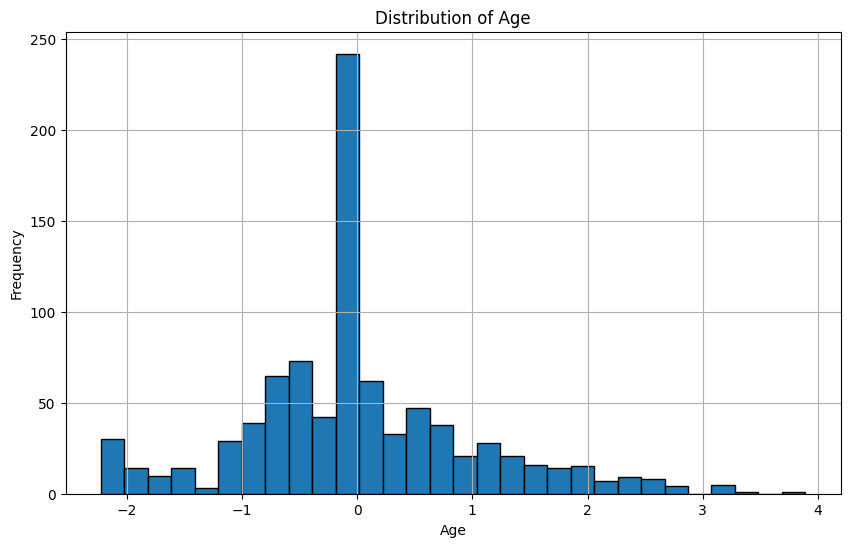

In [15]:
# Visualization 1: Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

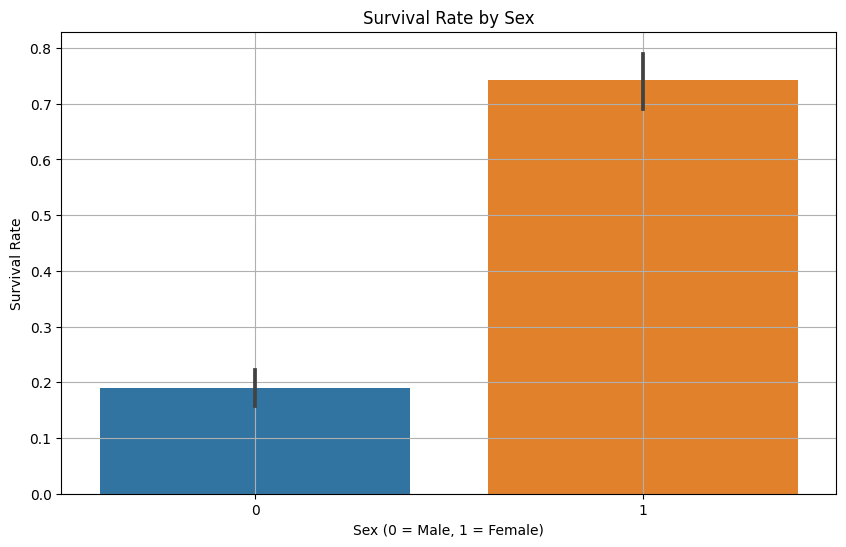

In [16]:
# Insight: Most passengers are young adults, with a smaller number of children and seniors.
# Visualization 2: Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

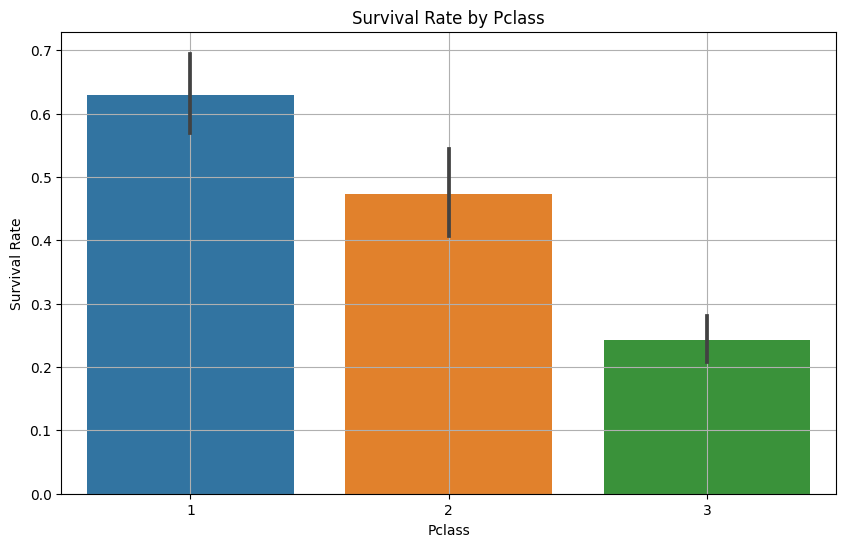

In [17]:
# Insight: Females had a higher survival rate than males, likely due to "women and children first" policy during evacuation.
# Visualization 3: Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

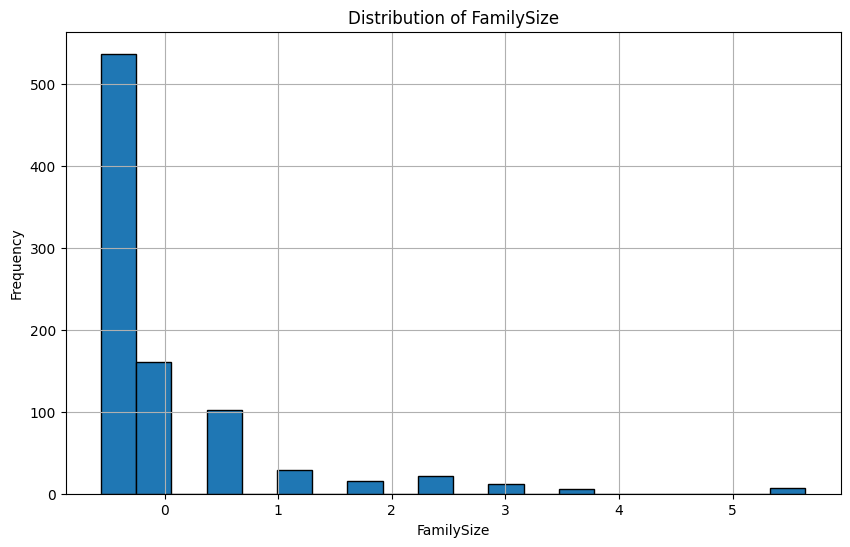

In [18]:
# Insight: Passengers in higher classes (1st class) had a better chance of survival compared to those in lower classes.
# Visualization 4: FamilySize distribution
plt.figure(figsize=(10, 6))
plt.hist(data['FamilySize'], bins=20, edgecolor='black')
plt.title('Distribution of FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

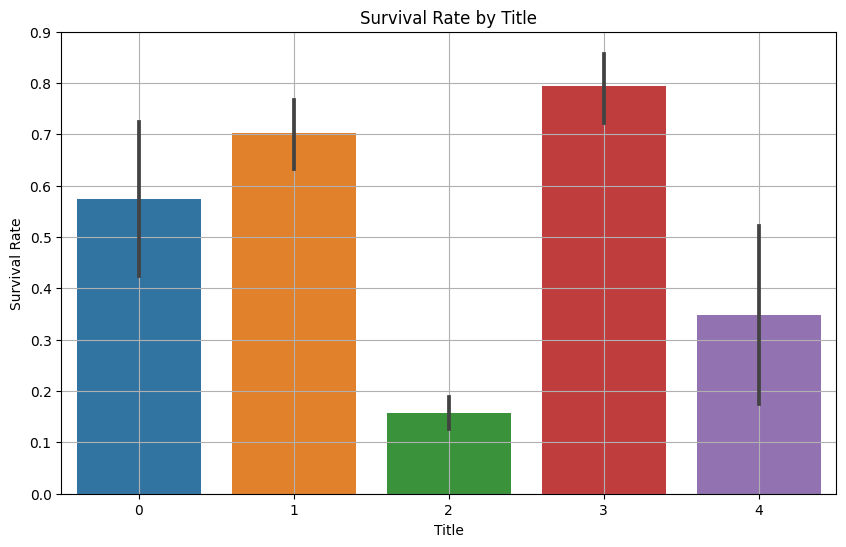

In [19]:
# Insight: Most passengers traveled alone or with one family member, larger families were less common.
# Visualization 5: Survival rate by Title
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=data)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

In [20]:
# Insight: Titles indicating higher social status (e.g., Mrs, Miss) had higher survival rates compared to titles like Mr and Others.
